## ICE-9 Spatial Filters
Please note that all the tasks and questions are extensions of the course's PPTs

## Task 1. Gaussian filters
Given the Gaussian mask creation formula: h(x,y) = exp(- (x.^2+y.^2) / (2*sigma^2)). Please create 3 by 3, 5 by 5, and 7 by 7 Gaussian masks and display the masks' matrices (assume sigma = 1). Apply these Gaussian filters to one image separately, and display the outputs. (DO NOT use any of the existing implementations for Gaussian  masks creation)

In [1]:

import numpy as np

def gauss2D(shape=(3,3),sigma=1):
    """
    2D gaussian mask
    
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


In [2]:
#3*3 gaussian mask
gauss_3 = gauss2D((3,3),1)
gauss_3

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [3]:
#5*5 gaussian mask
gauss_5 = gauss2D((5,5),1)
gauss_5

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [4]:
#7*7 gaussian mask
gauss_7 = gauss2D((7,7),1)
gauss_7

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


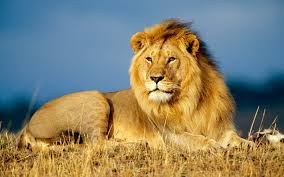

In [6]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Feature_Engineering/priyanka/6.jpg')
cv2_imshow(img)
cv2.waitKey()
cv2.imwrite('image.jpg', img)
cv2.destroyAllWindows()

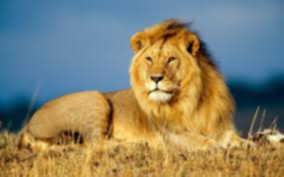

In [7]:
image_3_3 = cv2.filter2D(src=img, ddepth=-1, kernel=gauss_3)
cv2_imshow(image_3_3)
cv2.waitKey()
cv2.imwrite('image_3.jpg', image_3_3)
cv2.destroyAllWindows()

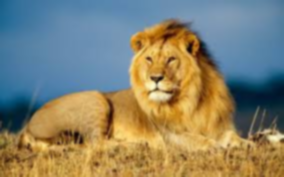

In [8]:
image_5_5 = cv2.filter2D(src=img, ddepth=-1, kernel=gauss_5)
cv2_imshow(image_5_5)
cv2.waitKey()
cv2.imwrite('image_5.jpg', image_5_5)
cv2.destroyAllWindows()

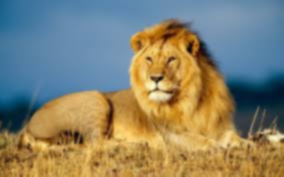

In [9]:
image_7_7 = cv2.filter2D(src=img, ddepth=-1, kernel=gauss_7)
cv2_imshow(image_7_7)
cv2.waitKey()
cv2.imwrite('image_7.jpg', image_7_7)
cv2.destroyAllWindows()

## Question 1. According to the filters you have learnt, which is the best one to remove the salt and pepper noise? Explain it.

Median filter is the best one to remove salt and pepper noise because it gives a smooth image and even preserves edges of the image after filtering out the noise.


---

## Task 2. Sharpening Filters
2.1 We know a sharp image can be obtained by by subtracting a smoothed (i.e low-passed) image from the original image. Please get a sharp image with the 7 by 7 Gaussian smoothing filter you built in task 1 and display the output.

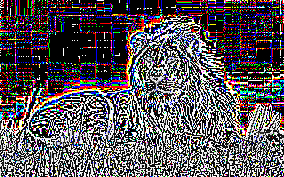

In [10]:

sharp_img = img - image_7_7
cv2_imshow(sharp_img)
cv2.waitKey()
cv2.imwrite('sharp_img.jpg', sharp_img)
cv2.destroyAllWindows()


2.2 Using the sharp image produced in task 2.1, please apply the unsharp masking and high boost filtering (k = 3) separately, and display the sharpening results.

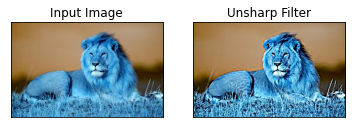

In [11]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

image = Image.fromarray(img.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()


## Question 2.1 Please give an example of 3 by 3 unsharp masking filter.
For instance, an example of sobel mask filter is: [[-1, -2, -1],[0, 0, 0],[1, 2, 1]].

**Answer to Q2.1**: type your answer here


## Question 2.2 Explain the difference between sharpening filter (high-pass) and unsharp masking filter
Given a 3 by 3 sharpening filter as [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]].

A fuzzy (unsharp) version of the image is blended with the original in the unsharp filter to create a sharper image. High-pass filters let high-frequency information through while blocking low-frequency information. It results in center gray areas, lighter and darker areas at the high-frequency boundaries of a copied layer. The crispness of the original is applied by changing the blend mode of this layer to Overlay or Soft Light. The light side is lightened and the dark side is darkened in the unsharp mask, increasing the contrast around the edges.

---